In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
startups = pd.read_csv('/Users/lisapletneva/Downloads/World_Wide_Unicorn_Startups.csv')
print(startups.shape)
startups.head()

(936, 10)


,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    936 non-null    object 
 1   Valuation  936 non-null    float64
 2   Date       936 non-null    object 
 3   Country    936 non-null    object 
 4   City       921 non-null    object 
 5   Industry   936 non-null    object 
 6   Investors  936 non-null    object 
 7   year       936 non-null    int64  
 8   month      936 non-null    int64  
 9   day        936 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 73.2+ KB


 <font color = '#0158e3'> *Исходя из числа значений в строках, можем сказать, что в строке city есть пропущенные значения*

# <font color = '#f364a2'> Проверка и косметические преобразования датасета и данных

###  №1 Переведем все буквы в названиях колонок в нижний регистр

In [4]:
def low_register_columns_names(name):
    new_name = name.lower()
    return new_name

In [5]:
startups.rename(columns=low_register_columns_names, inplace=True)

In [6]:
startups.columns

Index(['company', 'valuation', 'date', 'country', 'city', 'industry',
       'investors', 'year', 'month', 'day'],
      dtype='object')

### №2 Поработаем с датами 
Столбцы year, month, day  - выглядят лишними, так как выполнять операции с датой мы можем и по одному столбцу date. Переведем этот столбец в нужный формат и удалим 3 последних столбца.

*Также можно заметить, что данные в столбцах month и day перепутаны местами (см. строка 2 - месяц 23).*

In [7]:
startups['date'] = pd.to_datetime(startups['date'], yearfirst = True)

In [8]:
startups.dtypes

company              object
valuation           float64
date         datetime64[ns]
country              object
city                 object
industry             object
investors            object
year                  int64
month                 int64
day                   int64
dtype: object

 <font color = '#0158e3'> *Проверили, что тип данных в столбце date изменился*

In [9]:
startups.drop(columns = ['year', 'month', 'day'], inplace = True)
startups.head()

,company,valuation,date,country,city,industry,investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm..."
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm..."
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm..."


 <font color = '#0158e3'> *Удалили ненужные столбцы*

### №3 Посмотрим уникальные значения колонок на предмет ошибок

In [10]:
startups['country'].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'Hong Kong', 'India', 'Indonesia', 'Germany', 'Mexico',
       'Canada', 'Turkey', 'South Korea', 'Netherlands', 'Israel',
       'Colombia', 'Belgium', 'Lithuania', 'Estonia', 'France', 'Austria',
       'Ireland', 'Singapore', 'Vietnam', 'United Arab Emirates',
       'Switzerland', 'Argentina', 'Spain', 'Japan', 'Luxembourg',
       'Nigeria', 'Santa Clara', 'Finland', 'Philippines', 'Denmark',
       'Senegal', 'Bermuda', 'Norway', 'South Africa', 'Chile',
       'Thailand', 'Malaysia', 'Czech Republic', 'Croatia',
       'United States,', 'Indonesia,'], dtype=object)

In [11]:
startups['country'].unique().shape

(47,)

 <font color = '#0158e3'> *Видим, что некоторые значения стран идут с запятой после названия*

In [12]:
startups['country'] = startups['country'].str.replace(',', '')
startups['country'].unique().shape

(45,)

 <font color = '#0158e3'> *Уникальных значений стало меньше на 2, так как ошибки были в 'United States,' и 'Indonesia,'*

In [13]:
startups['city'].unique()

array(['Beijing', 'Hawthorne', 'San Francisco', 'Stockholm',
       'Surry Hills', 'London', 'Sao Paulo', 'Cary', nan, 'Bengaluru',
       'Shanghai', 'Jakarta', 'Jacksonville', 'Shenzhen', 'Philadelphia',
       'Waltham', 'San Diego', 'Roseville', 'Munich', 'Luohe',
       'Cheung Sha Wan', 'Walpole', 'New York', 'Boston', 'Glendale',
       'Berlin', 'Kirkland', 'Gurugram', 'Lerma de Villada', 'Reading',
       'Mountain View', 'San Jose', 'San Mateo', 'Chicago', 'Changsha',
       'Mumbai', 'Irving', 'Vancouver', 'Istanbul', 'Santa Clara',
       'Seoul', 'Pittsburgh', 'Palo Alto', 'Hangzhou', 'Amsterdam',
       'Los Angeles', 'Tel Aviv', 'Hoboken', 'Brooklyn', 'Oakland',
       'Fremont', 'Bogota', 'Brussels', 'Atlanta', 'Campinas',
       'Melbourne', 'Irvine', 'Burlingame', 'Zhuhai', 'Vilnius',
       'Seattle', 'Tallinn', 'Eden Prairie', 'Paris', 'Inglewood',
       'Sunnyvale', 'Montreal', 'Vienna', 'Redwood City', 'El Segundo',
       'Mississauga', 'Dublin', 'Columbus', 'Ca

 <font color = '#0158e3'> *Видимых ошибок не обнаружено*

In [14]:
startups['industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [15]:
startups['industry'].unique().shape

(17,)

 <font color = '#0158e3'> *Ошибки в 2 индустриях: 'Artificial intelligence' и 'Artificial Intelligence', 'Fintech' и 'Finttech'*

In [16]:
startups['industry'] = startups['industry'].apply(lambda x: 'Artificial Intelligence' if x == 'Artificial intelligence' else x)
startups['industry'] = startups['industry'].apply(lambda x: 'Fintech' if x == 'Finttech' else x)

In [17]:
startups['industry'].unique().shape

(15,)

 <font color = '#0158e3'> *После преобразования названий индустрий к одному виду, их число уникальных значений уменьшилось на 2, как и должно было произойти*

 <font color = '#0158e3'> *Для удобства также переведем колонку industry в категориальный тип*

In [18]:
startups['industry'] = pd.Categorical(startups['industry'])

In [19]:
startups.dtypes

company              object
valuation           float64
date         datetime64[ns]
country              object
city                 object
industry           category
investors            object
dtype: object

 <font color = '#0158e3'> *Проверили, что тип данных в колонке изменился*

# <font color = '#f364a2'> Анализ данных об оценке стартапов

### №1 Вывод топ-10 стартапов по оценке 

#### В рамках этой задачи мы можем отсортировать оценку стартапов от большего к меньшему и затем напечатать первые 10 значений с помощью конкатенации и с помощью метода format

In [20]:
startups.sort_values(by = ['valuation'], ascending = False)[:10]

,company,valuation,date,country,city,industry,investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm..."
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm..."
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm..."
5,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm..."
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm..."
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm..."


In [21]:
for i in range(10):
    print('Компания ' + startups.loc[i, 'company'] + ' имеет оценку ' + str(startups.loc[i, 'valuation']) + ' и входит в ТОП-10 дорогих стартапов')

Компания Bytedance имеет оценку 140.0 и входит в ТОП-10 дорогих стартапов
Компания SpaceX имеет оценку 100.3 и входит в ТОП-10 дорогих стартапов
Компания Stripe имеет оценку 95.0 и входит в ТОП-10 дорогих стартапов
Компания Klarna имеет оценку 45.6 и входит в ТОП-10 дорогих стартапов
Компания Canva имеет оценку 40.0 и входит в ТОП-10 дорогих стартапов
Компания Instacart имеет оценку 39.0 и входит в ТОП-10 дорогих стартапов
Компания Databricks имеет оценку 38.0 и входит в ТОП-10 дорогих стартапов
Компания Revolut имеет оценку 33.0 и входит в ТОП-10 дорогих стартапов
Компания Nubank имеет оценку 30.0 и входит в ТОП-10 дорогих стартапов
Компания Epic Games имеет оценку 28.7 и входит в ТОП-10 дорогих стартапов


In [22]:
for i in range(10):
    print ('Компания {} имеет оценку {} и выходит в ТОП-10 дорогих стартапов'.format (startups.loc[i, 'company'], startups.loc[i, 'valuation']))

Компания Bytedance имеет оценку 140.0 и выходит в ТОП-10 дорогих стартапов
Компания SpaceX имеет оценку 100.3 и выходит в ТОП-10 дорогих стартапов
Компания Stripe имеет оценку 95.0 и выходит в ТОП-10 дорогих стартапов
Компания Klarna имеет оценку 45.6 и выходит в ТОП-10 дорогих стартапов
Компания Canva имеет оценку 40.0 и выходит в ТОП-10 дорогих стартапов
Компания Instacart имеет оценку 39.0 и выходит в ТОП-10 дорогих стартапов
Компания Databricks имеет оценку 38.0 и выходит в ТОП-10 дорогих стартапов
Компания Revolut имеет оценку 33.0 и выходит в ТОП-10 дорогих стартапов
Компания Nubank имеет оценку 30.0 и выходит в ТОП-10 дорогих стартапов
Компания Epic Games имеет оценку 28.7 и выходит в ТОП-10 дорогих стартапов


### №2 Самый дорогой и самый дешевый стартап

In [23]:
startups[startups['valuation'] == startups['valuation'].max()]

,company,valuation,date,country,city,industry,investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm..."


In [24]:
startups[startups['valuation'] == startups['valuation'].min()]

,company,valuation,date,country,city,industry,investors
679,Hailo,1.0,2021-06-23,Israel,Tel Aviv,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm..."
706,Lookout,1.0,2013-10-10,United States,San Francisco,Cybersecurity,"0 Sequoia Capital China, SIG Asia Investm..."
707,Snapdeal,1.0,2014-05-21,India,New Delhi,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm..."
708,TechStyle Fashion Group,1.0,2014-08-29,United States,El Segundo,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm..."
709,InMobi,1.0,2014-12-02,India,Bengaluru,Mobile & telecommunications,"0 Sequoia Capital China, SIG Asia Investm..."
...,...,...,...,...,...,...,...
931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm..."
932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm..."
933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm..."
934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,"0 Sequoia Capital China, SIG Asia Investm..."


 <font color = '#0158e3'> *Как мы видим, у нас один стартап с максимальной оценкой 140 и при этом 225 стартапов с минимальной оценкой 1.* <br>
  *Посмотрим среднюю и медианную стоимость стартапов и моду*

### №3 Средняя, медианная стоимость стартапов и мода 

#### Можем сделать это через метод describe, а можем через отдельные методы:

In [25]:
startups['valuation'].describe()

count    936.000000
mean       3.281154
std        7.473179
min        1.000000
25%        1.050000
50%        1.600000
75%        3.000000
max      140.000000
Name: valuation, dtype: float64

In [26]:
startups['valuation'].mean()

3.281153846153838

In [27]:
startups['valuation'].median()

1.6

In [28]:
startups['valuation'].mode()

0    1.0
Name: valuation, dtype: float64

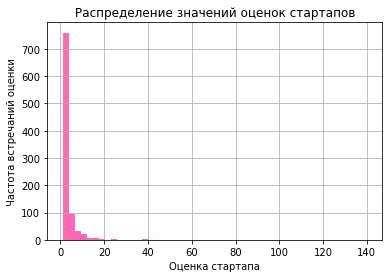

In [29]:
startups['valuation'].hist(bins = 50, color = '#FF69B4')
plt.xlabel('Оценка стартапа')
plt.ylabel('Частота встречаний оценки')
plt.title('Распределение значений оценок стартапов')
plt.show()

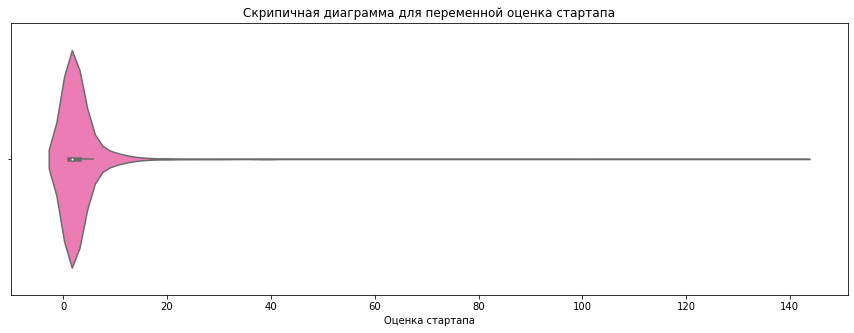

In [30]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(15,5))
sns.violinplot(x='valuation', data=startups, color = '#FF69B4')
plt.xlabel('Оценка стартапа')
plt.title('Скрипичная диаграмма для переменной оценка стартапа')
plt.show()

 <font color = '#0158e3'> *Исходя из гистограммы и скрипичной диаграммы, значений среднего, медианы и моды можем сделать вывод, что присутствуют аномально высокие значения стоимости стартапов, которые являются выбросами*

### №4 Поиск выбросов методом 3 сигм

In [31]:
upper_level = startups['valuation'].mean() + 3 * startups['valuation'].std()
lower_level = startups['valuation'].mean() - 3 * startups['valuation'].std()

In [32]:
upper_level

25.700690217509536

In [33]:
lower_level

-19.13838252520186

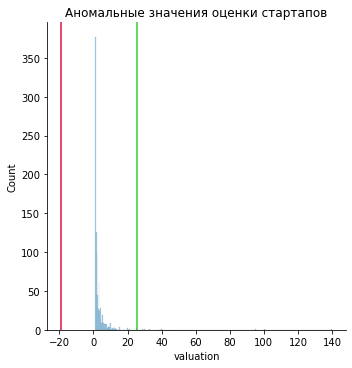

In [34]:
sns.displot(startups['valuation'], color = '#87CEFA')
plt.axvline(x = upper_level, color = '#32CD32', linestyle = '-')
plt.axvline(x = lower_level, color = '#DC143C', linestyle = '-')
plt.title('Аномальные значения оценки стартапов')
plt.show()

In [35]:
startups[startups['valuation'] > upper_level]

,company,valuation,date,country,city,industry,investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm..."
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm..."
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm..."
5,Instacart,39.0,2014-12-30,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm..."
6,Databricks,38.0,2019-02-05,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm..."
7,Revolut,33.0,2018-04-26,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
8,Nubank,30.0,2018-03-01,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
9,Epic Games,28.7,2018-10-26,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm..."


In [36]:
startups[startups['valuation'] > upper_level].value_counts('industry')

industry
Fintech                                4
Other                                  2
Artificial Intelligence                1
Data management & analytics            1
Internet software & services           1
Supply chain, logistics, & delivery    1
Auto & transportation                  0
Consumer & retail                      0
Cybersecurity                          0
E-commerce & direct-to-consumer        0
Edtech                                 0
Hardware                               0
Health                                 0
Mobile & telecommunications            0
Travel                                 0
dtype: int64

 <font color = '#0158e3'> *Таким образом, используя правило 3 сигм, мы нашли аномально высокие значения стоимости стартапов, которые лежат за пределами 3 сигм от математического ожидания и выходят за 99,7% значений.*
    <br> *Таких стартапов 10: Bytedance, SpaceX, Stripe, Klarna, Canva, Instacart, Databricks, Revolut, Nubank, Epic Games и 40% из них пренадлежат Финтех сектору*
    <br> *Аномально низких значений у нас нет, так как нижняя граница -19, а стоимость всех стартапов положительная.*
    <br> *Можем посмотреть, как изменятся значения описательной статистики, если убрать выбросы*

### №5 Описательная статистика данных без выбросов

In [37]:
startups_without_anomaly = startups[startups['valuation'] < upper_level]
startups_without_anomaly.head()

,company,valuation,date,country,city,industry,investors
10,Chime,25.0,2019-03-05,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
11,FTX,25.0,2021-07-20,Hong Kong,NaN,Fintech,"0 Sequoia Capital China, SIG Asia Investm..."
12,BYJU's,21.0,2017-07-25,India,Bengaluru,Edtech,"0 Sequoia Capital China, SIG Asia Investm..."
13,Xiaohongshu,20.0,2016-03-31,China,Shanghai,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm..."
14,J&T Express,20.0,2021-04-07,Indonesia,Jakarta,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm..."


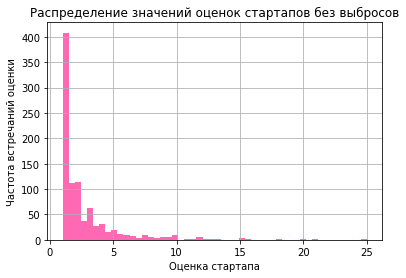

In [38]:
startups_without_anomaly['valuation'].hist(bins = 50, color = '#FF69B4')
plt.xlabel('Оценка стартапа')
plt.ylabel('Частота встречаний оценки')
plt.title('Распределение значений оценок стартапов без выбросов')
plt.show()

In [39]:
startups_without_anomaly['valuation'].describe()

count    926.000000
mean       2.679870
std        2.848006
min        1.000000
25%        1.050000
50%        1.600000
75%        3.000000
max       25.000000
Name: valuation, dtype: float64

<font color = '#0158e3'> *Как мы видим, в значениях об оценке стартапов без выбросов 1/2/3 квартили не изменились, изменилось среднее значение с 3.28 до 2.68 и среднеквадратичное отклонение снизилось с 7.47 до 2.84.*
    <br> *В целом, для дальнейшего использования можем использовать первоначальный датасет, так как он дает более полную картину о стоимости стартапов за период.*

### №6 Создание категорий стартапов на основе их стоимости

#### Добавим отдельный столбик в наш датасет, в котором будут лежать категории стартапов по их оценке

In [40]:
def valuation_category(valuation):
    if valuation <= 1.05:
        return 'low-estimated'
    elif valuation <= 3:
        return 'mid-estimated'
    else:
        return 'high-estimated'

 <font color = '#0158e3'> *Значения категорий основаны на 25% и 75% квартилях*

In [41]:
startups['category'] = startups['valuation'].apply(valuation_category)

In [42]:
startups['category'] = pd.Categorical(startups['category'])

In [43]:
startups['category'].value_counts()

mid-estimated     474
low-estimated     236
high-estimated    226
Name: category, dtype: int64

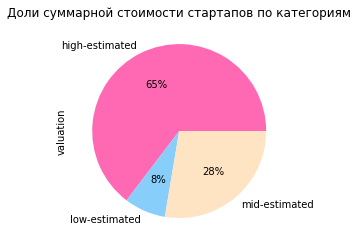

In [44]:
colors = ['#FF69B4', '#87CEFA', '#FFE4C4']
startups.groupby('category')['valuation'].sum()\
.plot(kind = 'pie', colors = colors, title = 'Доли суммарной стоимости стартапов по категориям', autopct = '%.0f%%')
plt.show()

### №7 Сколько компаний присоединялось каждый год и какая была их суммарная оценка

In [45]:
year_addition = startups.value_counts(startups['date'].dt.year)
year_addition

date
2021    480
2019    110
2020    110
2018    107
2017     46
2015     37
2016     22
2014     13
2012      4
2013      3
2011      2
2007      1
2010      1
dtype: int64

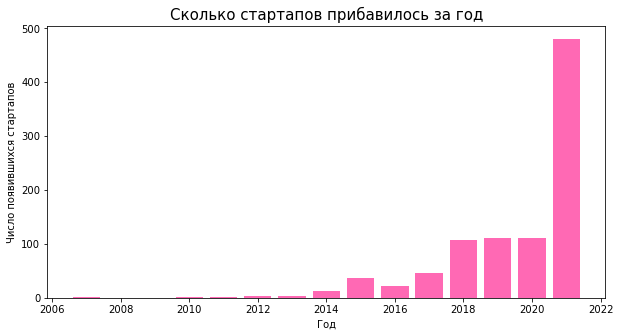

In [46]:
plt.figure(figsize=(10,5))
plt.bar(year_addition.index, year_addition, color = '#FF69B4')
plt.xlabel('Год')
plt.ylabel('Число появившихся стартапов')
plt.title('Сколько стартапов прибавилось за год', fontdict={"fontsize":15})
plt.show()

 <font color = '#0158e3'> *Как мы видим наибольшее число стартапов приходится на 2021 год, а в период 2018 - 2020 годов число стартапов было примерно одинаковое, общий тренд положительный*

In [47]:
year_addition_sum = startups.groupby(startups['date'].dt.year)['valuation'].sum()
year_addition_sum

date
2007      1.38
2010      3.00
2011     51.30
2012    122.30
2013      4.30
2014    165.38
2015     99.55
2016     81.04
2017    296.14
2018    495.47
2019    416.08
2020    362.48
2021    972.74
Name: valuation, dtype: float64

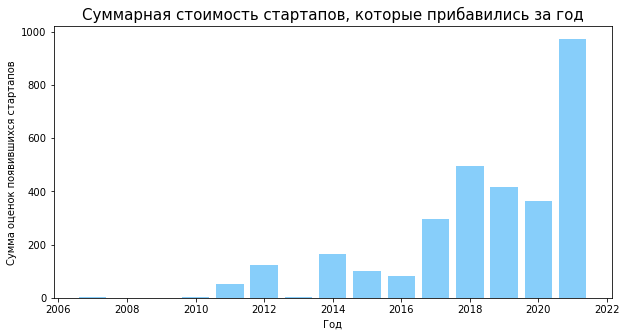

In [48]:
plt.figure(figsize=(10,5))
plt.bar(year_addition_sum.index, year_addition_sum, color = '#87CEFA')
plt.xlabel('Год')
plt.ylabel('Сумма оценок появившихся стартапов')
plt.title('Суммарная стоимость стартапов, которые прибавились за год', fontdict={"fontsize":15})
plt.show()

 <font color = '#0158e3'> *Аналогично числу стартапов, за 2021 год у нас наибольшая суммарная оценка стартапов, а в период 2018 - 2020 года, когда число появившихся стартапов было примерно одинаковым, выделяется 2018 год по суммарной оценке - можем посмотреть, сколько "high-estimated" компаний возникло в этот период*

In [49]:
startups[startups['date'].dt.year == 2018].query("category == 'high-estimated'").shape

(42, 8)

<font color = '#0158e3'> *За 2018 год появилось 42 высоко-оцененных стартапа, поэтому этот год выбивается на графике. Сравним с числом высоко-оценнных стартапов за 2019 и 2020 год*

In [50]:
startups[startups['date'].dt.year == 2019].query("category == 'high-estimated'").shape

(36, 8)

In [51]:
startups[startups['date'].dt.year == 2020].query("category == 'high-estimated'").shape

(46, 8)

<font color = '#0158e3'> *За 2020 год возникло больше высоко-оценнных стартапов, чем за 2018, хотя суммарная оценка всех стартапов все равно ниже, поэтому сравним суммы высоко-оценнных стартапов за все года*

In [52]:
startups.query("category == 'high-estimated'")\
.groupby(startups['date'].dt.year)\
.agg({'valuation': 'sum'})

,valuation
date,
2011,51.30
2012,118.30
2014,157.88
2015,54.70
2016,58.06
2017,247.70
2018,398.80
2019,288.67
2020,259.19


<font color = '#0158e3'> *Таким образом, несмотря на то, что в 2020 году число высоко-оцененных стартапов было больше, чем в 2018 (46 vs 42), их суммарная оценка все равно была ниже (259,2 vs 398,8)*

# <font color = '#f364a2'> Анализ стартапов по индустриям

### №1 Сколько стартапов в каждой индустрии

In [53]:
df = startups.value_counts('industry')
df.sum()

936

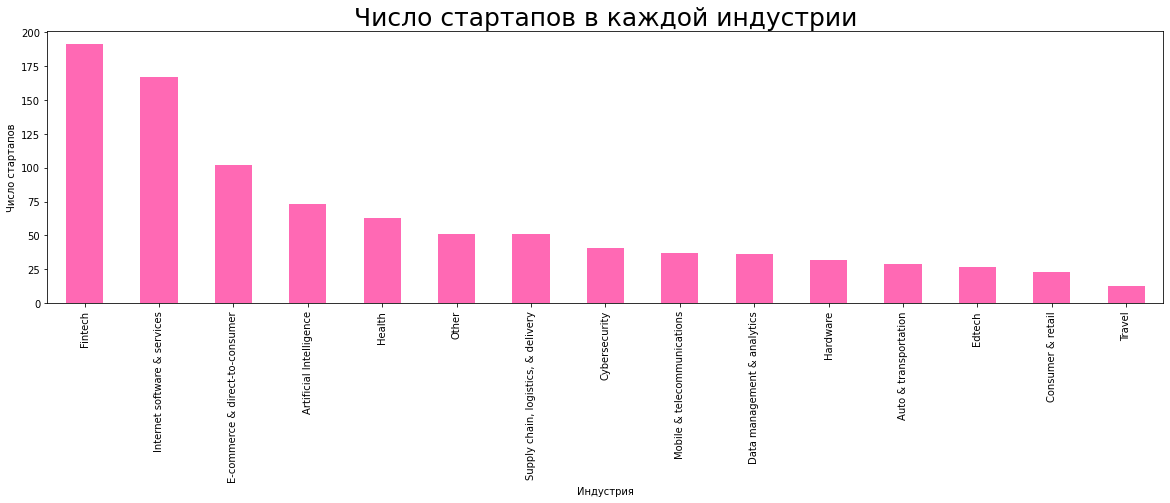

In [54]:
startups.value_counts('industry').plot(kind="bar",figsize=(20,5), color = '#FF69B4')
plt.xlabel('Индустрия')
plt.ylabel('Число стартапов')
plt.title('Число стартапов в каждой индустрии', fontdict={"fontsize":25})
plt.show()

<font color = '#0158e3'> *Наибольшее число стартапов принадлежит Финтех индустрии, на 2ом месте ПО и услуги*

### №2 Суммарная оценка стартапов по индустриям

In [55]:
startups.groupby('industry')\
.agg({'valuation': 'sum'})\
.sort_values('valuation', ascending = False)

,valuation
industry,
Fintech,744.13
Internet software & services,483.76
Artificial Intelligence,312.84
E-commerce & direct-to-consumer,291.10
Other,245.46
Health,166.26
"Supply chain, logistics, & delivery",146.29
Data management & analytics,121.70
Cybersecurity,107.54


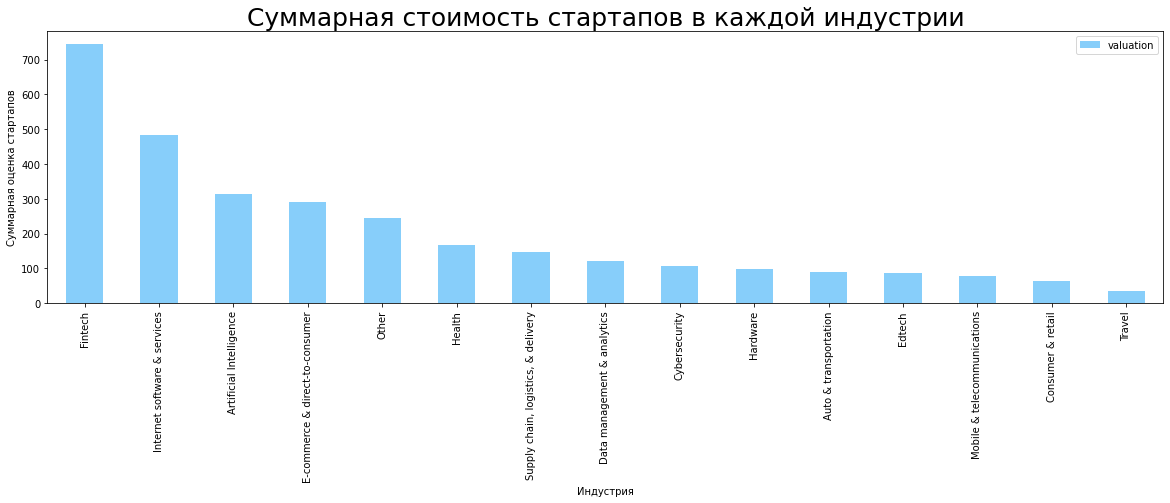

In [56]:
startups.groupby('industry')\
.agg({'valuation': 'sum'})\
.sort_values('valuation', ascending = False)\
.plot(kind="bar",figsize=(20,5), color = '#87CEFA')
plt.xlabel('Индустрия')
plt.ylabel('Суммарная оценка стартапов')
plt.title('Суммарная стоимость стартапов в каждой индустрии', fontdict={"fontsize":25})
plt.show()

<font color = '#0158e3'> *Аналогично количеству стартапов в индустрии, наибольшая суммарная стоимость у стартапов принадлежащих индустрии финтех и ПО и услуги*

### №3 Средняя стоимость стартапов в каждой индустрии

In [57]:
startups.groupby('industry')\
.agg({'valuation': 'mean'})\
.sort_values('valuation', ascending = False)

,valuation
industry,
Other,4.812941
Artificial Intelligence,4.285479
Fintech,3.895969
Data management & analytics,3.380556
Edtech,3.161852
Hardware,3.080938
Auto & transportation,3.079310
Internet software & services,2.896766
"Supply chain, logistics, & delivery",2.868431


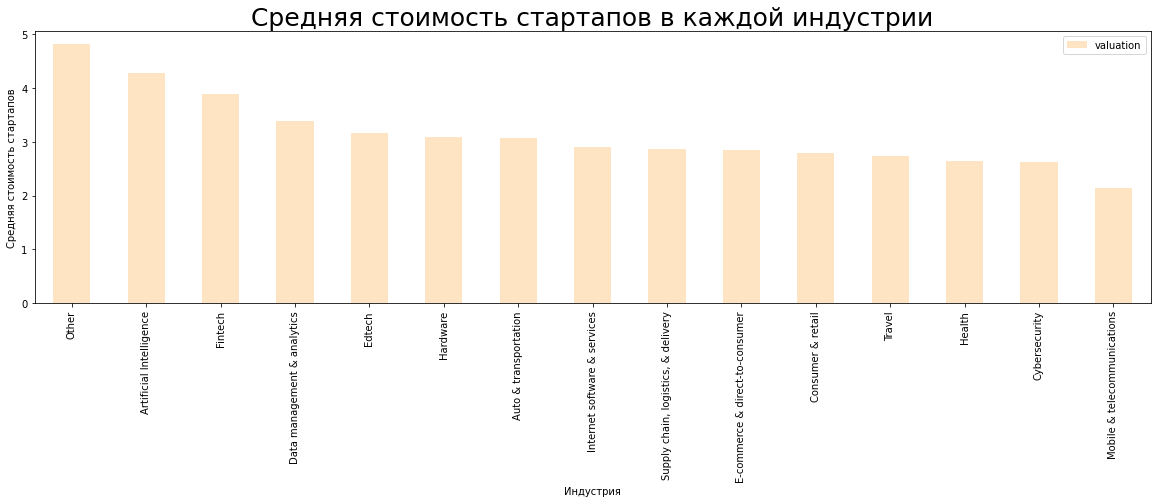

In [58]:
startups.groupby('industry')\
.agg({'valuation': 'mean'})\
.sort_values('valuation', ascending = False)\
.plot(kind="bar",figsize=(20,5), color = '#FFE4C4')
plt.xlabel('Индустрия')
plt.ylabel('Средняя стоимость стартапов')
plt.title('Средняя стоимость стартапов в каждой индустрии', fontdict={"fontsize":25})
plt.show()

<font color = '#0158e3'> *Наибольшая средняя стоимость стартапов у "других" индустрий, на 2ом месте стартапы, связанные с индустрией ИИ*

### №4 Минимальная и максимальная стоимость стартапов по индустриям

In [59]:
startups.groupby('industry')\
.agg({'valuation': 'min'})

,valuation
industry,
Artificial Intelligence,1.0
Auto & transportation,1.0
Consumer & retail,1.0
Cybersecurity,1.0
Data management & analytics,1.0
E-commerce & direct-to-consumer,1.0
Edtech,1.0
Fintech,1.0
Hardware,1.0


In [60]:
startups.groupby('industry')\
.agg({'valuation': 'max'})\
.sort_values('valuation', ascending = False)

,valuation
industry,
Artificial Intelligence,140.0
Other,100.3
Fintech,95.0
Internet software & services,40.0
"Supply chain, logistics, & delivery",39.0
Data management & analytics,38.0
Edtech,21.0
E-commerce & direct-to-consumer,20.0
Hardware,15.0


   <font color = '#0158e3'> *Стартапы с наивысшей оценкой принадлежат индустрии ИИ и "другим".
    <br> Как раз за счет наличия стартапов с такой высокой оценкой эти две индустрии имеют наиболее высокие средние оценки стартапов*

### №5 Единая табличка со всеми метриками по индустриям

In [61]:
startups.groupby('industry')\
.agg(**{'count' : ('valuation', 'count'), 'sum_value' : ('valuation', 'sum'), 'mean_value' : ('valuation', 'mean'),
        'min_value' : ('valuation', 'min'), 'max_value' : ('valuation', 'max')})\
.sort_values('count', ascending = False)

,count,sum_value,mean_value,min_value,max_value
industry,,,,,
Fintech,191,744.13,3.895969,1.0,95.0
Internet software & services,167,483.76,2.896766,1.0,40.0
E-commerce & direct-to-consumer,102,291.10,2.853922,1.0,20.0
Artificial Intelligence,73,312.84,4.285479,1.0,140.0
Health,63,166.26,2.639048,1.0,12.6
Other,51,245.46,4.812941,1.0,100.3
"Supply chain, logistics, & delivery",51,146.29,2.868431,1.0,39.0
Cybersecurity,41,107.54,2.622927,1.0,9.0
Mobile & telecommunications,37,79.09,2.137568,1.0,9.0


   <font color = '#0158e3'> *Для удобства дальнейшего анализа объединили все стандартные интересующие нас метрики в один запрос*

### №6 Сколько стартапов и какая их суммарная оценка в каждой индустрии в разрезе их ценовой категории

In [62]:
startups.groupby(['industry', 'category'])\
.agg(**{'count': ('valuation', 'count'), 'sum_value' : ('valuation', 'sum')})

count  sum_value
industry                            category                        
Artificial Intelligence             high-estimated     15     229.12
                                    low-estimated      26      26.08
                                    mid-estimated      32      57.64
Auto & transportation               high-estimated     10      55.51
                                    low-estimated       3       3.01
                                    mid-estimated      16      30.78
Consumer & retail                   high-estimated      5      38.66
                                    low-estimated       6       6.00
                                    mid-estimated      12      19.47
Cybersecurity                       high-estimated      8      51.70
                                    low-estimated       8       8.00
                                    mid-estimated      25      47.84
Data management & analytics         high-estimated     10      83.20
                                    low-estimated       6       6.05
                                    mid-estimated      20      32.45
E-commerce & direct-to-consumer     high-estimated     27     178.03
                                    low-estimated      25      25.05
                                    mid-estimated      50      88.02
Edtech                              high-estimated      6      51.39
                                    low-estimated       8       8.00
                                    mid-estimated      13      25.98
Fintech                             high-estimated     51     524.18
                                    low-estimated      46      46.00
                                    mid-estimated      94     173.95
Hardware                            high-estimated      9      66.58
                                    low-estimated      11      11.05
                                    mid-estimated      12      20.96
Health                              high-estimated     17     101.75
                                    low-estimated      17      17.04
                                    mid-estimated      29      47.47
Internet software & services        high-estimated     39     277.27
                                    low-estimated      32      32.05
                                    mid-estimated      96     174.44
Mobile & telecommunications         high-estimated      8      38.59
                                    low-estimated      14      14.05
                                    mid-estimated      15      26.45
Other                               high-estimated     12     186.90
                                    low-estimated      12      12.00
                                    mid-estimated      27      46.56
Supply chain, logistics, & delivery high-estimated      7      86.05
                                    low-estimated      20      20.06
                                    mid-estimated      24      40.18
Travel                              high-estimated      2      16.85
                                    low-estimated       2       2.00
                                    mid-estimated       9      16.75

   <font color = '#0158e3'> *С помощью этой таблички мы можем наглядно посмотреть какая категория стартапов по оценке преобладает в каждой индустрии и по количеству, и по суммарной стоимости*

<font color = '#191970'> *Глобальный вывод по анализу индустрий стартапов:*
    <br> *Больше всего стартапов было создано в отраслях - финтех, ПО и услуги, e-commerce & direct-to-consumer. Меньше всего стартапов в индустрии путешествий.*
    <br> *По суммарной оценке топ отраслей - это финтех, ПО и услуги и ИИ, индустрия e-commerce & direct-to-consumer в этот топ не входит, хотя число стартапов там больше, чем в индустрии ИИ.*
    <br> *Средняя стоимость стартапов выше всего в индустрии "другое", ИИ и финтех. Первым двум индустриям как раз принадлежат стартапы с самой максимальной оценкой. Самая низкая средняя стоимость у стартапов индустрии мобайл и телекоммуникации.*
    

# <font color = '#f364a2'> Анализ стартапов по странам

### №1 Количество, суммарная оценка, средняя, минимальная и максимальная оценки стартапов по странам

In [63]:
startups.groupby('country')\
.agg(**{'count' : ('valuation', 'count'), 'sum_value' : ('valuation', 'sum'), 'mean_value' : ('valuation', 'mean'),
        'min_value' : ('valuation', 'min'), 'max_value' : ('valuation', 'max')})\
.sort_values('count', ascending = False)

,count,sum_value,mean_value,min_value,max_value
country,,,,,
United States,478,1605.03,3.357803,1.00,100.30
China,169,569.48,3.369704,1.00,140.00
India,51,148.45,2.910784,1.00,21.00
United Kingdom,37,150.29,4.061892,1.00,33.00
Germany,23,66.63,2.896957,1.00,11.00
Israel,21,43.82,2.086667,1.00,6.00
France,19,35.61,1.874211,1.00,4.30
Brazil,15,61.05,4.070000,1.00,30.00
Canada,15,37.73,2.515333,1.00,7.60


In [64]:
countries = startups.groupby('country')\
.agg({'valuation':'count'})\
.sort_values('valuation', ascending = False)

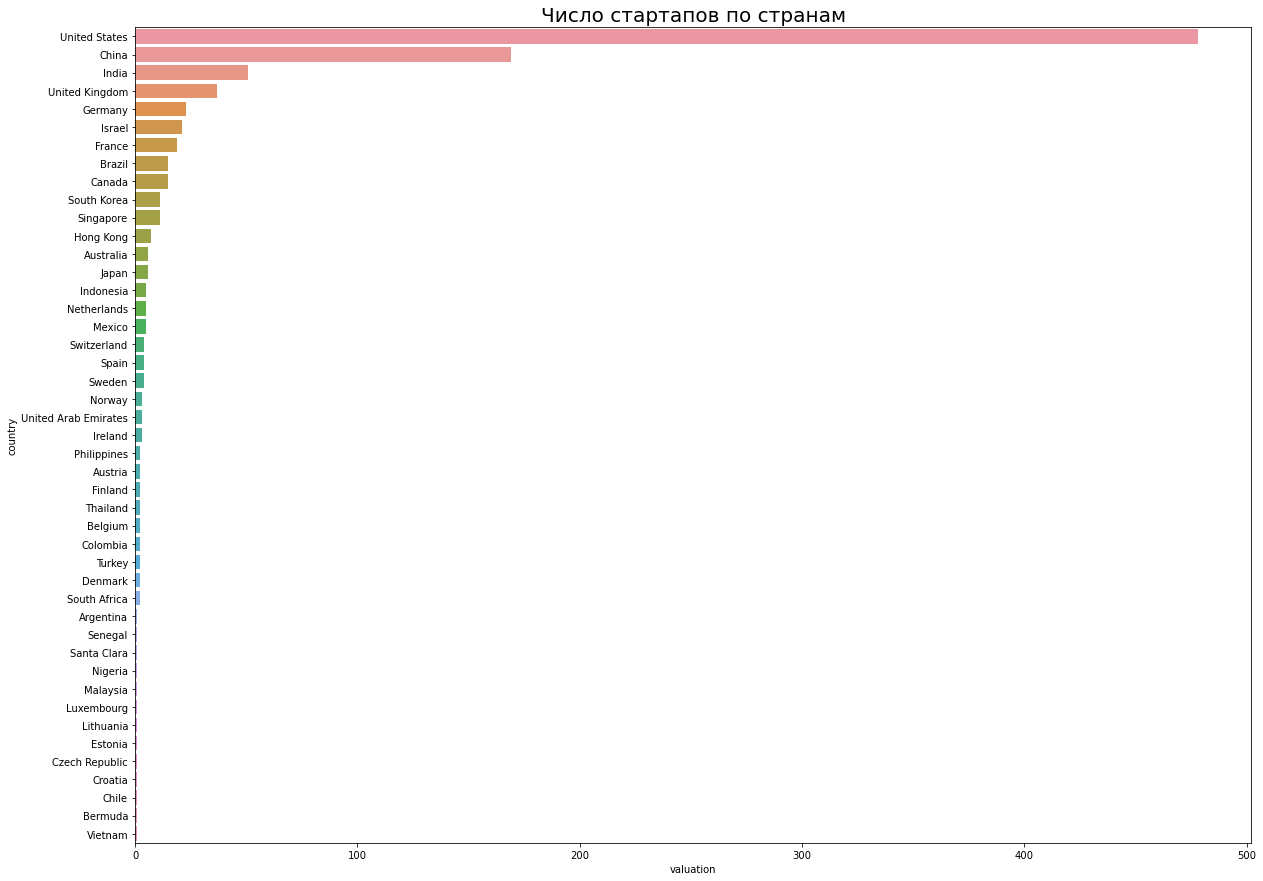

In [65]:
plt.figure(figsize = (20,15))
plt.title('Число стартапов по странам', fontsize = 20)
sns.barplot(y = countries.index, x = countries.valuation, alpha = 1)
plt.show()

   <font color = '#0158e3'> *Больше всего стартапов зарегистрировано в США, при этом их число превышает почти в 3 раза количество стартапов у ближайшего конкурента - Китая. Суммарная оценка стартапов также выше всего в США, однако средняя стоимость стартапов выше в Китае и там же находится самый дорогой стартап.*
   <br> *В целом лидерами по числу стартапов являются 3 страны - США, Китай и Индия.*

### №2 Какие индустрии стартапов преобладают в ТОП-3 странах с их наибольшим числом

In [66]:
country_industries = startups[startups['country'].isin(['United States', 'China', 'India'])]\
.groupby(['industry', 'country'])\
.agg({'company' : 'count'})\
.unstack()
(country_industries / country_industries.sum() * 100).round()

company                    
country                               China India United States
industry                                                       
Artificial Intelligence                11.0   0.0           8.0
Auto & transportation                  10.0   4.0           1.0
Consumer & retail                       5.0   0.0           2.0
Cybersecurity                           1.0   0.0           6.0
Data management & analytics             1.0   0.0           6.0
E-commerce & direct-to-consumer        18.0  24.0           6.0
Edtech                                  7.0  10.0           1.0
Fintech                                 5.0  24.0          21.0
Hardware                               10.0   0.0           2.0
Health                                  5.0   4.0           9.0
Internet software & services            8.0  16.0          26.0
Mobile & telecommunications             8.0   2.0           3.0
Other                                   3.0   4.0           5.0
Supply chain, logistics, & delivery     7.0  12.0           4.0
Travel                                  2.0   2.0           0.0

<font color = '#0158e3'> *В США преобладают стартапы индустрий ПО и услуги (26%) и Финтех (21%).*
    <br>*В Китае преобладают стартапы индустрии E-commerce & direct-to-consumer (18%).*
    <br>*В Индии преобладают стартапы индустрий E-commerce & direct-to-consumer (24%) и Финтех (24%).*
    <br>*Исходя из процентного соотношения индустрий в этих 3 странах, можем сказать, что в Китае менее всего выражена специализация и концентрация стартапов на 1-2 индустриях, в Китае стартапы более разноплановые.*

### №3 Вывод данных о самом дорогом стартапе в каждой стране

In [67]:
for country in startups.country.unique():
    print('Самый дорогой стартап в {} - это {}.'.format(country, startups[startups.country == country].sort_values('valuation', ascending=False)['company'].tolist()[0]))

Самый дорогой стартап в China - это Bytedance.
Самый дорогой стартап в United States - это SpaceX.
Самый дорогой стартап в Sweden - это Klarna.
Самый дорогой стартап в Australia - это Canva.
Самый дорогой стартап в United Kingdom - это Revolut.
Самый дорогой стартап в Brazil - это Nubank.
Самый дорогой стартап в Hong Kong - это FTX.
Самый дорогой стартап в India - это BYJU's.
Самый дорогой стартап в Indonesia - это J&T Express.
Самый дорогой стартап в Germany - это Celonis.
Самый дорогой стартап в Mexico - это Kavak.
Самый дорогой стартап в Canada - это Dapper Labs.
Самый дорогой стартап в Turkey - это Getir.
Самый дорогой стартап в South Korea - это Toss.
Самый дорогой стартап в Netherlands - это Mollie.
Самый дорогой стартап в Israel - это Wiz.
Самый дорогой стартап в Colombia - это Rappi.
Самый дорогой стартап в Belgium - это Collibra.
Самый дорогой стартап в Lithuania - это Vinted.
Самый дорогой стартап в Estonia - это Bolt.
Самый дорогой стартап в France - это Sorare.
Самый дорого

# <font color = '#f364a2'> Анализ стартапов по городам

### №1 Количество, суммарная оценка, средняя, минимальная и максимальная оценки стартапов по городам

  <font color = '#0158e3'> *Как мы помним, у нас были пропущенные данные по городам. Можно вывести строки, где пропущены названия городов и проставить значения.*

In [68]:
startups[startups['city'].isna()]

,company,valuation,date,country,city,industry,investors,category
11,FTX,25.0,2021-07-20,Hong Kong,NaN,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",high-estimated
192,HyalRoute,3.5,2020-05-26,Singapore,NaN,Mobile & telecommunications,"0 Sequoia Capital China, SIG Asia Investm...",high-estimated
399,Advance Intelligence Group,2.0,2021-09-23,Singapore,NaN,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",mid-estimated
572,Trax,1.3,2019-07-22,Singapore,NaN,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",mid-estimated
677,Amber Group,1.1,2021-06-21,Hong Kong,NaN,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",mid-estimated
682,Carousell,1.1,2021-09-15,Singapore,NaN,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",mid-estimated
735,WeLab,1.0,2017-11-08,Hong Kong,NaN,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",low-estimated
812,PatSnap,1.0,2021-03-16,Singapore,NaN,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",low-estimated
840,Moglix,1.0,2021-05-17,Singapore,NaN,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",low-estimated
843,Matrixport,1.0,2021-06-01,Singapore,NaN,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",low-estimated


  <font color = '#0158e3'> *Значения пропущены в тех колонках, где название страны совпадает с названием города, поэтому можем заменить пропуски в колонке city значениями колонки country.*

In [69]:
startups['city'].fillna(startups['country'], inplace = True)

In [70]:
startups.iloc[843:849]

,company,valuation,date,country,city,industry,investors,category
843,Matrixport,1.0,2021-06-01,Singapore,Singapore,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",low-estimated
844,Shippo,1.0,2021-06-02,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",low-estimated
845,Thirty Madison,1.0,2021-06-02,United States,New York,Health,"0 Sequoia Capital China, SIG Asia Investm...",low-estimated
846,LetsGetChecked,1.0,2021-06-07,Ireland,Dublin,Health,"0 Sequoia Capital China, SIG Asia Investm...",low-estimated
847,EcoFlow,1.0,2021-06-10,China,Shenzhen,Hardware,"0 Sequoia Capital China, SIG Asia Investm...",low-estimated
848,Carro,1.0,2021-06-14,Singapore,Singapore,E-commerce & direct-to-consumer,"0 Sequoia Capital China, SIG Asia Investm...",low-estimated


  <font color = '#0158e3'> *Проверили, что замена произошла. Можем продолжить работу с данными.*

In [71]:
startups.groupby('city')\
.agg(**{'count' : ('valuation', 'count'), 'sum_value' : ('valuation', 'sum'), 'mean_value' : ('valuation', 'mean'),
        'min_value' : ('valuation', 'min'), 'max_value' : ('valuation', 'max')})\
.sort_values('count', ascending = False)

,count,sum_value,mean_value,min_value,max_value
city,,,,,
San Francisco,134,602.12,4.493433,1.0,95.0
New York,81,175.44,2.165926,1.0,10.0
Beijing,62,289.57,4.670484,1.0,140.0
Shanghai,45,115.45,2.565556,1.0,20.0
London,28,126.38,4.513571,1.0,33.0
...,...,...,...,...,...
Islandia,1,1.10,1.100000,1.1,1.1
Jacksonville,1,18.00,18.000000,18.0,18.0
Jaipur,1,1.20,1.200000,1.2,1.2


   <font color = '#0158e3'> *Больше всего стартапов зарегистрировано в Сан-Франциско и Нью-Йорке - 134 и 81 стартап соответственно, что составляет примерно половину от всех стартапов в США. На 3 и 4 месте идут города Китая - Пекин и Шанхай, число стартапов в которых также суммарно составляет половину числа стартапов по всему Китаю. И на 5 месте по количеству стартапов идет Лондон.*
    <br> *Из ТОП-5 городов по суммарной стоимости стартапов лидирует Сан-Франциско, а по среднему значению - Пекин, где также находится и самый дорогой стартап.*

### №2 Какие индустрии стартапов преобладают в ТОП-5 городах с их наибольшим числом

In [72]:
city_industries = startups[startups['city'].isin(['San Francisco', 'New York', 'Beijing', 'Shanghai', 'London'])]\
.groupby(['industry', 'city'])\
.agg({'company' : 'count'})\
.unstack()
(city_industries / city_industries.sum() * 100).round()

company                                \
city                                Beijing London New York San Francisco   
industry                                                                    
Artificial Intelligence                15.0    7.0      6.0           6.0   
Auto & transportation                   0.0    0.0      1.0           0.0   
Consumer & retail                       6.0    0.0      4.0           3.0   
Cybersecurity                           0.0    0.0      6.0           5.0   
Data management & analytics             2.0    0.0      5.0           1.0   
E-commerce & direct-to-consumer        19.0    4.0      5.0           4.0   
Edtech                                 13.0    0.0      1.0           2.0   
Fintech                                 6.0   71.0     32.0          26.0   
Hardware                                5.0    4.0      1.0           1.0   
Health                                  3.0    0.0     15.0           7.0   
Internet software & services            8.0    4.0     20.0          33.0   
Mobile & telecommunications            15.0    0.0      0.0           4.0   
Other                                   0.0    7.0      2.0           2.0   
Supply chain, logistics, & delivery     3.0    4.0      1.0           4.0   
Travel                                  5.0    0.0      0.0           1.0   

                                              
city                                Shanghai  
industry                                      
Artificial Intelligence                 11.0  
Auto & transportation                   22.0  
Consumer & retail                        4.0  
Cybersecurity                            0.0  
Data management & analytics              0.0  
E-commerce & direct-to-consumer         11.0  
Edtech                                   7.0  
Fintech                                  0.0  
Hardware                                11.0  
Health                                   2.0  
Internet software & services             9.0  
Mobile & telecommunications              9.0  
Other                                    2.0  
Supply chain, logistics, & delivery     11.0  
Travel                                   0.0

<font color = '#0158e3'> *Очень четко специализация стартапов выражена в Лондоне, где 71% стартапов принадлежат финтех индустрии. затем идет Сан-Франциско - 33% стартапов в области ПО и услуг, 26% - Финтех. И на 3 месте Нью-Йорк - 32% - стартапы Финтех индустрии.*
    <br> *В городах Китая - Шанхае и Пекине специализация не так ярко-выражена.*